<center><h1>Diving into Data Modeling and Validation</h1></center>

# Welcome to Day 7
# Classification
**Where do we use this?**<br>
Basically wherever we need to classify something.

<img src="imgs/classification.png">

# Different Classification Models

There are many classification models which are used in ML problems. Let's dive into classification models. Basically we will learn the most popular decision tree method today!

Lets Learn with example
<br>
<img src="imgs/DT1.jpg">
<br>
<center> First Step </center>
<br>
<img src="imgs/DT2.jpg">
<br>
<center> Second Step </center>
<br>
<img src="imgs/DT3.jpg">
<br>
<center> Third Step </center>

Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well.

**Decision tree** is a type of supervised learning algorithm that is mostly used in classification problems. It works for both classification and regression tasks. A Decision Tree builds models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets by learning a series of explicit if-then rules on feature values that results in predicting a target value.

<img src="imgs/decision_tree.png" alt="drawing" width="500">

#### Important Terminology related to Decision Trees
Let’s look at the basic terminology used with Decision trees:

<img src="imgs/decision_tree_term.png" alt="drawing" width="500">

* **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
* **Splitting:** It is a process of dividing a node into two or more sub-nodes.
* **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
* **Leaf/Terminal Node:** Nodes do not split is called Leaf or Terminal node.
* **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
* **Branch/Sub-Tree:** A sub section of entire tree is called branch or sub-tree.
* **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

#### Split Measures
Decision tree algorithms use split measures to split a node. **Gini** or **Entropy** is the criterion for calculating the best split. These generally measure the homogeneity of the target variable within the subsets. These metrics are applied to each candidate subset, and the resulting values are combined (e.g., averaged) to provide a measure of the quality of the split.

<img src="imgs/ginientropy.jpg" alt="drawing" width="500">

To make it simple: <br>
<img src="imgs/Entropy_3.png">

#### Import the dataset

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("purchase_data.csv")

data.head()

,UserID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
data.drop(["UserID"], axis=1, inplace=True)

### Do the preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data["Gender"])
data['Gender'] = le.transform(data["Gender"])
le.classes_

array(['Female', 'Male'], dtype=object)

### Perform Machine Learning

**Step 01:** Segregate the target and features columns. Split your data into **training** and **test** sets.

In [4]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns!='Purchased']
y = data.loc[:, data.columns=='Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

print("""X_train:{}
y_train:{}
X_test: {}
y_test: {}""".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(320, 3)
y_train:(320, 1)
X_test: (80, 3)
y_test: (80, 1)


**Step 02:** Select the appropriate machine learning algorithms according to the nature of your data.

DecisionTreeClassifier()

**Step 03:** Select the metrics that are important to you according to the problem.

We'll use the **$Accuracy$** as our evaluation metric.

**Step 04:** Train the algorithm using the **training set**. 



In [5]:
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
lr.fit(X_train, y_train)

DecisionTreeClassifier()

**Step 05:** Make preditions on the **test data** and evaluate your model's performance.

In [6]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [7]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,1
8,1,1
9,0,0


In [8]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.85


<a id='case2'></a>
## Case Study 2: Classification

<h3 style=color:navy>Problem Description:</h3>

Have you ever heared about the job "**Wine Testing**"? 

<img src="imgs/wine_tester.jpg" alt="drawing" width="500">

While a degree is not required to become a wine taster, it is difficult to land a top job without having some training in wine. Wine tasters work in wineries, bars, for magazines and even in hotels and restaurants. According to an article by Kathleen Green on the Bureau of Labor Statistics website, it is estimated that a wine tester (master sommelier) can earn as much as **\$160,000 a year**. Simply Hired estimates that less-experienced wine tasters make an average of **\$71,000** a year as of 2012.

The wine production companies don't want to pay such a big ammount to the wine testers anymore. They have a good collection of their previous wine quality data with ratings in a range of $0-2$. Now, they want you to build a model that can accurately predict ratings for a newly produced wine using the previous parameters.

**Note:** Here, the target is to predict a rating. Rating has a range of $0-2$. It is an ordinal categorical variable. Here, **0=Bad Quality, 1=Good Quality, and 2=Best Quality**. So, we can approch the problem as a classification problem.

#### Let your model HACK the job of wine testers!!

### Step 1: Data Collection

In [9]:
import pandas as pd

data_clsf = pd.read_csv("classification_wine_quality.csv")

### Step 2: Exploration

Let's have a glance of the data.

In [10]:
data_clsf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


What about the data shape and datatypes?

In [11]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data_clsf.shape[1], 
                                      data_clsf.shape[0],
                                      len(data_clsf.select_dtypes('O').columns),
                                      len(data_clsf.select_dtypes(['int', 'float']).columns)))


No of columns: 12
No of rows: 1599
No of categorical columns: 0
No of numerical columns: 11


Here, we don't have any categorical columns. That's easy!!

Let's have a descriptive statistical tables of the numeric columns.

In [12]:
data_clsf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


How's the distribution of numerical columns?

<Figure size 432x288 with 0 Axes>

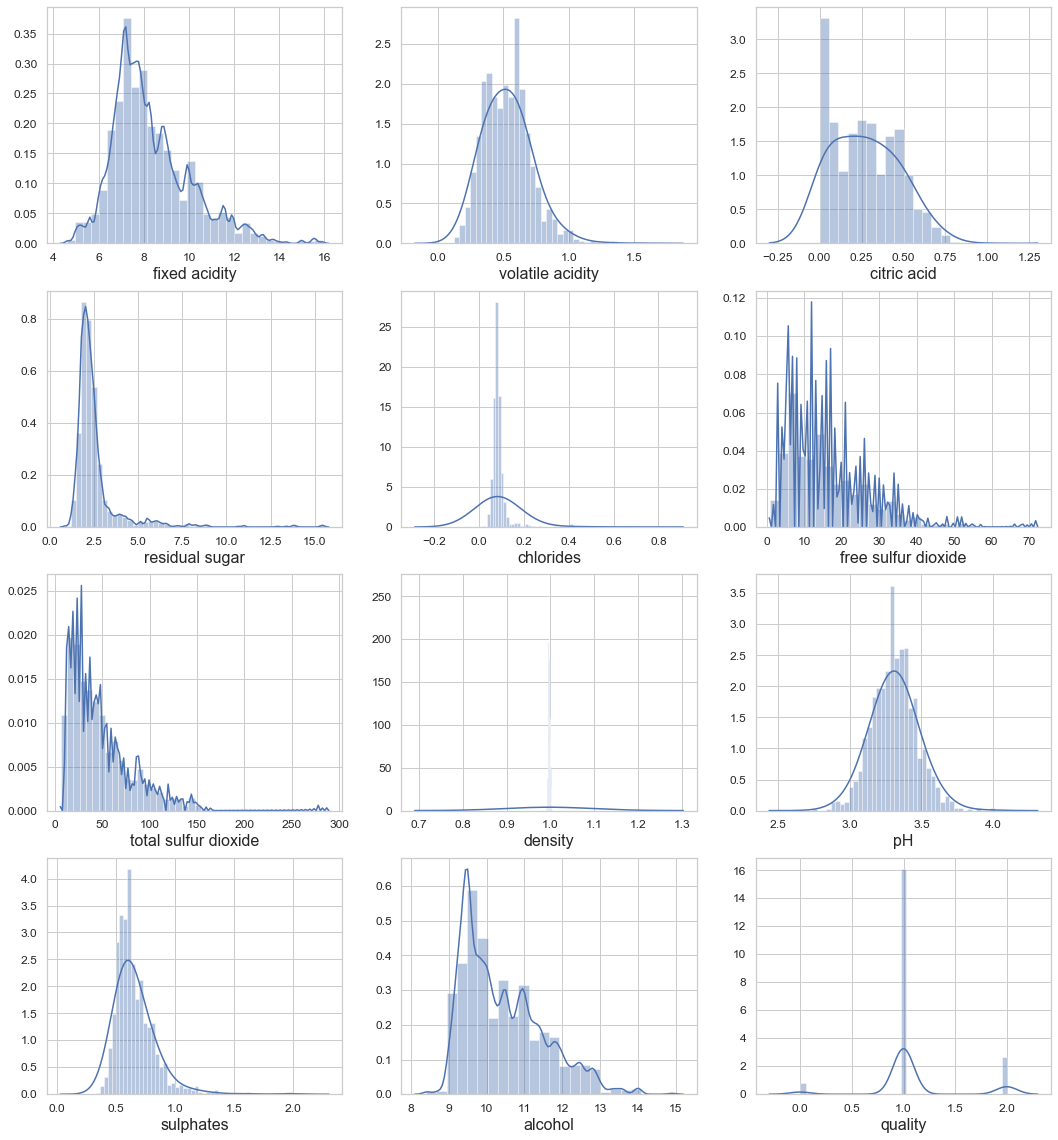

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,20))
    sns.set_style("whitegrid")
    

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature],  kde_kws={'bw':0.1})
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data_clsf, data_clsf.columns)

Amazing!!

Very well distributed data!

Let's quickly check the correlations between the columns?

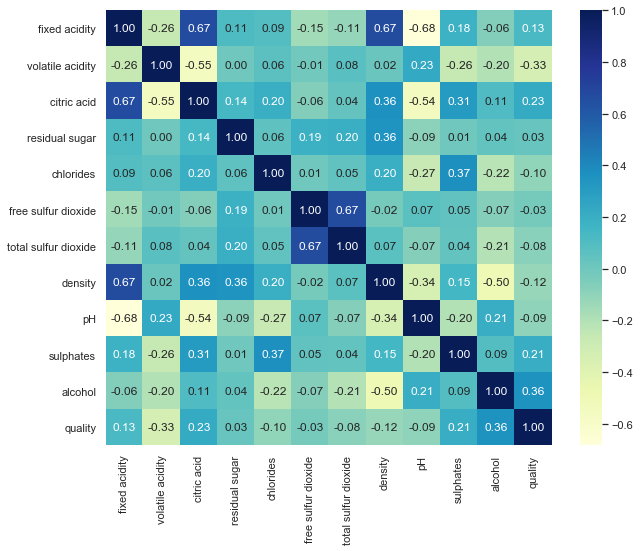

In [18]:
corr = data_clsf.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="YlGnBu");

### Step 3: Data Preprocessing

Are there any **missing values**?

In [19]:
pd.DataFrame(data_clsf.isnull().sum(), columns=['Missing Values'])

,Missing Values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


DAMN!! We are very lucky!! Still we've got no missing values!

What percentage belongs to what ratings? Let's understand the rating distribution in our data.
It is very important to check wheather your classification dataset is balanced or not.

In [20]:
val_counts = data_clsf['quality'].value_counts()
sizes = val_counts.values
labels = val_counts.index

class_dist = pd.DataFrame({"rating":labels,
                           "count":sizes,
                           "percentage": np.round((sizes/sum(sizes))*100, 2)})
class_dist

,rating,count,percentage
0,1,1319,82.49
1,2,217,13.57
2,0,63,3.94


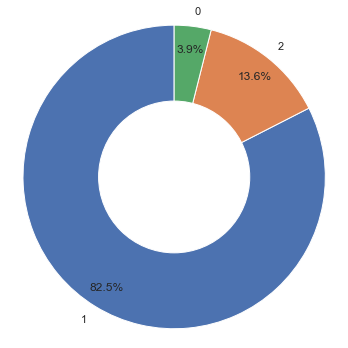

In [21]:
def plot_class_dist(sizes, labels):
    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.pie(sizes, 
            labels=labels, 
            autopct='%1.1f%%', 
            startangle=90,
            pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    plt.show();
    
plot_class_dist(sizes, labels);

So, the data is not well distributed. It is called the **imbalanced class** problem. The dominant rating is 1=Good Quality. To get a better accuracy from the model, we might need to balance the dataset using **sampling techniques(oversampling/undersampling)**.

Now, it's time for **data segregation**. We need to separate the feature columns and target column.

In [22]:
X = data_clsf.loc[:, data_clsf.columns!='quality']
y = data_clsf.loc[:, data_clsf.columns=='quality']

For this problem, we don't need to normalize/standardize the feaures. Because wwe have very well-distributed features. And also we'll train a **tree based model** this time, **which is not affected by feature transformation**. 

So, let's jump to making the **traing and validation** dataset.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 1279 data points.
y_train has 1279 data points.
X_test has 320 data points.
y_test has 320 data points.



### Step 4: Modeling

WOOOHAAA!! 

Again, we've reached the modeling part! The easiest one!

We'll use **Decision Tree** algorithm for data modeling. This is one of the most powerful yet an easy model. The best thing about Decision Tree is you can extract the **feature importance** from the model and also interpret the tree for **extracting the underlying patterns** in data.

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(random_state=1234)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

### Step 5: Validation

In [25]:
y_pred = clf_model.predict(X_test)

There are wide variety of evaluation metrics for validating regression models such as **Accuracy, AUC, Precision, Recall, F1 score**. For our problem we'll use the **accuracy** metric.

**Remember:** Accuracy is not always the best metric to valiate classification model. Sometime, depending on the problem, you'll need to choose other metrics.

In [26]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)

print("The accuracy score is {}".format(acc_score))

The accuracy score is 0.821875


### Step 6: Communication

#### Get the Feature importance

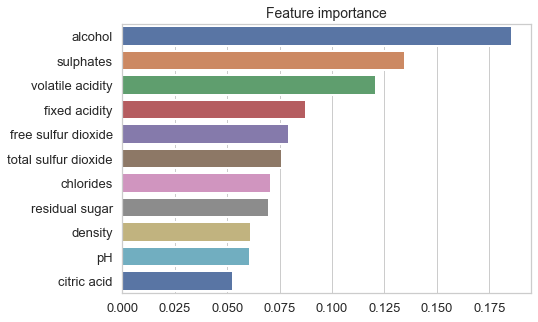

In [27]:
coef = pd.Series(clf_model.feature_importances_, index = X.columns)
imp_coef = coef.sort_values(ascending=False)

def plot_importance(feat_imp, feat_name):
    fig, ax = plt.subplots(figsize=(8,5)) 
    sns.set(style="darkgrid", context="poster")
    sns.barplot(feat_imp, feat_name, palette="deep")
    plt.title("Feature importance", fontsize=14)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.tight_layout()
    
plot_importance(imp_coef.values, imp_coef.index)

# I expect you to learn about these models,
<li>Support Vector Machine </li>
<li>Random Forest Classifier </li>
<li>Logistic Regression </li>
<li>K Nearest Neighbors </li>
<li>Naive Bayes </li>